# Функции и библиотеки

In [1]:
from graphlib.structures import Graph
import graphlib.algorithms as alg
import graphlib.tools as tls

import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
sns.set(font_scale = 1.2)

random.seed(0)

# Загрузка данных, количество ребер и вершин; плотность

In [2]:
vk_dataset = pd.read_csv('datasets/vk.csv')
ed = [(str(node1), str(node2)) for node1, node2 in zip(vk_dataset.u.tolist(), vk_dataset.v.tolist())]
vk_dataset.head()

,u,v,t,h
0,3248374,11431799,27,6
1,3429130,4795235,13,8
2,105512,8910840,74,2
3,7900466,9739979,36,9
4,7296485,9838285,52,2


In [3]:
%%time

G = Graph('vk', edges=ed)
print(G)

Граф <vk> с 3215720 вершинами and 17414510 ребрами
Wall time: 4min 20s


# Количество компонент связности, характеристики наибольшей компоненты

In [4]:
%%time

number, largest_index, components = alg.DFS_with_cc(G, largest=True)
largest_component = G.subgraph(nodes=components[largest_index])

Wall time: 5min 4s


In [5]:
print(f'Количество компонент связности - {number}')
print(f'Наибольшая компонента связности: {largest_component.nodes_count} вершин и {largest_component.edges_count} ребер',)

Количество компонент связности - 24337
Наибольшая компонента связности: 3162217 вершин и 17378782 ребер


In [6]:
nodes_in_largest_component = largest_component.nodes
print(f'Доля вершин в наибольшей компоненте слабой связности: {round(largest_component.nodes_count / G.nodes_count, 3)}')

Доля вершин в наибольшей компоненте слабой связности: 0.983


## Доля вершин в текущей компоненте слабой связности при удалении x% случайных вершин

Wall time: 52 s


Text(0, 0.5, 'Доля вершин в наибольшей компоненте')

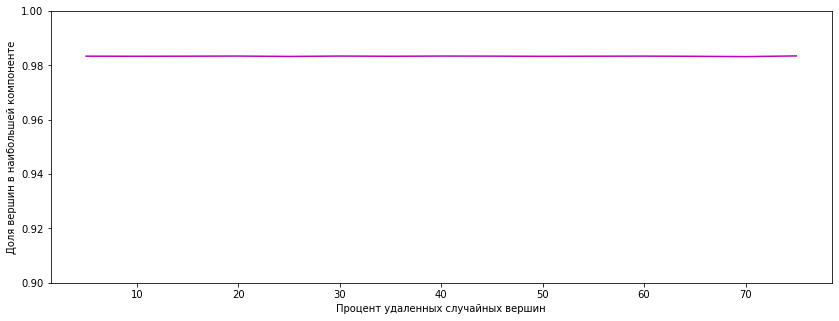

In [7]:
%%time

procent_of_removing = np.arange(5, 80, 5) # от 5 до 75 с шагом 5
props = []
for x in procent_of_removing:
    n = round(G.nodes_count * (x/100)) # число удаляемых вершин
    removing_nodes = G.selection(x=n,
                                 most_degree=False)
    tmp_set = nodes_in_largest_component - removing_nodes
    proportion = len(tmp_set) / (G.nodes_count-n)
    props.append(proportion)
    

plt.figure(figsize=(14, 5))
plt.plot(procent_of_removing, props, 'm')
plt.ylim(0.9, 1)
plt.xlabel('Процент удаленных случайных вершин')
plt.ylabel('Доля вершин в наибольшей компоненте')

## Доля вершин в новой наибольшей компоненте слабой связности при удалении x% случайных вершин

In [ ]:
procent_of_removing = np.arange(5, 80, 5) # от 5 до 75 с шагом 5
props = []
for x in procent_of_removing:
    # удаление вершин
    n = round(G.nodes_count * (x/100))
    removing_nodes = G.selection(x=n,
                                 most_degree=False)
    tmp_set = G.nodes - removing_nodes
    
    # выделение новой компоненты
    G_after_removing = G.subgraph(nodes=tmp_set)
    _, largest_i, cc = alg.DFS_with_cc(G_after_removing, largest=True)
    largest_c = G_after_removing.subgraph(nodes=cc[largest_i])
    
    # подсчет доли
    proportion = round(largest_c.nodes_count / G_after_removing.nodes_count, 3)
    props.append(proportion)

plt.figure(figsize=(14, 7))
plt.plot(procent_of_removing, props, 'm')
plt.ylim(0, 1)
plt.xlabel('Процент удаленных случайных вершин')
plt.ylabel('Доля вершин в наибольшей компоненте')

## Доля вершин в текущей компоненте слабой связности при удалении x% вершин наибольшей степени

In [ ]:
%%time

procent_of_removing = np.arange(5, 80, 5) # от 5 до 75 с шагом 5
props = []
for x in procent_of_removing:
    n = round(G.nodes_count * (x/100)) # число удаляемых вершин
    removing_nodes = G.selection(x=n,
                                 most_degree=True)
    tmp_set = nodes_in_largest_component - removing_nodes
    proportion = len(tmp_set) / (G.nodes_count-n)
    props.append(proportion)
    

plt.figure(figsize=(14, 5))
plt.plot(procent_of_removing, props, 'm')
plt.xlabel('Процент удаленных вершин наибольшей степени')
plt.ylabel('Доля вершин в наибольшей компоненте')
plt.ylim(0.8, 1)

## Доля вершин в новой наибольшей компоненте слабой связности при удалении x%   вершин наибольшей степени

In [ ]:
procent_of_removing = np.arange(5, 80, 5) # от 5 до 75 с шагом 5
props = []
for x in procent_of_removing:
    # удаление вершин
    n = round(G.nodes_count * (x/100))
    removing_nodes = G.selection(x=n,
                                 most_degree=True)
    tmp_set = G.nodes - removing_nodes
    
    # выделение новой компоненты
    G_after_removing = G.subgraph(nodes=tmp_set)
    _, largest_i, cc = alg.DFS_with_cc(G_after_removing, largest=True)
    largest_c = G_after_removing.subgraph(nodes=cc[largest_i])
    
    # подсчет доли
    proportion = round(largest_c.nodes_count / G_after_removing.nodes_count, 3)
    props.append(proportion)

plt.figure(figsize=(14, 7))
plt.plot(procent_of_removing, props, 'm')
plt.ylim(0, 1)
plt.xlabel('Процент удаленных случайных вершин')
plt.ylabel('Доля вершин в наибольшей компоненте')

# Метрические характеристики графа: диаметр, радиус и 90 процентиль (approximation)

In [ ]:
%%time

diam = tls.diameter_approximate(graph=largest_component,
                                number=500)

In [ ]:
%%time

radius = tls.radius_approximate(graph=largest_component,
                                number=500)

In [ ]:
%%time

percentile = tls.geodesic_percentile_approximate(graph=largest_component,
                                                 number=500,
                                                 percent=90)

In [ ]:
print(f'Диаметр наибольшей компоненты (приближенно): {diam}')
print(f'Радиус наибольшей компоненты (приближенно): {radius}')
print(f'90% процентиль геодезического расстояния в наибольшей компоненте (приближенно): {percentile}')

# Функция вероятности для степени узла в графе
Минимальная, максимальная, средняя степень узла в графе. Надо построить функцию вероятности (можно в виде гистограммы относительных частот)

In [ ]:
%%time
degrees = list(map(lambda elem: elem[1], list(G.node_degrees())))
max_deg = max(degrees)
min_deg = min(degrees)
mean_deg = int(sum(degrees)/ len(degrees))

In [ ]:
print('Максимальная степень узла:', max(degrees))
print('Минимальная степень узла:', min(degrees))
print('Средняя степень узла:', int(sum(degrees)/len(degrees)))

In [ ]:
plt.figure(figsize=(16, 7))
plt.hist(np.array(degrees), bins=160, color='m')
plt.title('Гистограмма частот степеней вершин')
plt.xlim(0, 500)
plt.xlabel('Степень вершины')
plt.ylabel('Количество вершин')

In [ ]:
plt.figure(figsize=(16, 7))
x_axis = np.arange(min_deg, max_deg+1)
y_axis = np.bincount(degrees) / G.nodes_count
y_axis = y_axis[min_deg:] 
plt.plot(x_axis, y_axis, c='m')

plt.title('Функция вероятности для степеней вершин в обычных шкалах')
plt.xlabel('Степень')
plt.ylabel('Вероятность')

In [ ]:
plt.figure(figsize=(15,7))
plt.loglog(x_axis, y_axis, c='m')
plt.title('Функция вероятности для степеней вершин в log-log шкалах')
plt.xlabel('Степень')
plt.ylabel('Вероятность')

# Число треугольников, глобальный и кластерный коэффициенты

In [ ]:
%%time
n_of_triangles = tls.number_of_triangles(G)

In [ ]:
%%time
average_cluster_coef = tls.average_clustering_coefficient(G)

In [ ]:
%%time
global_cluster_coef = tls.global_clustering_coefficient(G)

In [ ]:
print(f'Число треугольников (K_3) в графе: {n_of_triangles}')
print(f'Средний кластерный коэффициент сети: {average_cluster_coef}')
print(f'Глобальный кластерный коэффициент сети: {global_cluster_coef}')